In [3]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import os

os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [7]:
# load the dataset
mnist = input_data.read_data_sets("data", one_hot = True) # labels are "one-hot vectors"

# model parameters
W = tf.Variable(tf.random_uniform([784, 10])) # 784个像素，10个类
b = tf.Variable(tf.random_uniform([10]))
learning_rate = 0.1
momentum = 0.9
batch_size = 64
max_iter = 1000

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz


[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


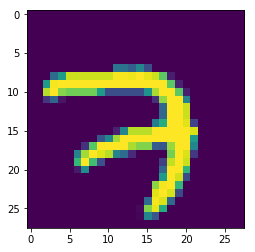

In [23]:
mnist.train.num_examples
img = mnist.train.images[0]
label = mnist.train.labels[0]
#print(img)
print(label)

# label is a one hot vector 十个数字十个维度，第几个维度是1代表了这个图片的数字标签

import matplotlib.pyplot as plt

# plt.imshow(img.reshape([28,28]), cmap='grey')
plt.imshow(img.reshape([28,28]))
plt.show()

In [24]:
# model inputs & outputs
# placeholder 用来装数据， variable 是变量 会变的
x = tf.placeholder(tf.float32, [None, 784]) # "None" means that a dimension can be of any length，现在还不确定所以输None
y_ = tf.placeholder(tf.float32, [None, 10])

# creat model
y = tf.matmul(x, W) + b

In [25]:
# loss function
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))

# optimizer
#optimizer = tf.train.GradientDescentOptimizer(learning_rate)
optimizer = tf.train.MomentumOptimizer(learning_rate, momentum)
train_step = optimizer.minimize(cross_entropy)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



In [27]:
# loss function 预测值和真实值的差距
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))

# optimizer
#optimizer = tf.train.GradientDescentOptimizer(learning_rate)
optimizer = tf.train.MomentumOptimizer(learning_rate, momentum)
train_step = optimizer.minimize(cross_entropy)

In [28]:
# accuracy test
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1)) # this gives us a list of booleans
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) # booleans->float32

# tf.argmax(y,1) 找到每行最大值的坐标， 若第二个数字为0 则是找到每列的最大值坐标

In [29]:
# training
init = tf.global_variables_initializer()
with tf.Session() as sess:  # sess = tf.Session()
    sess.run(init) # 初始化
    for iter in range(3000):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        test_x = mnist.test.images
        test_y = mnist.test.labels
        sess.run(train_step, {x:batch_x, y_:batch_y})
        if iter%10 == 0:
            train_loss = sess.run(cross_entropy,{x:batch_x,y_:batch_y})
            train_accuracy = sess.run(accuracy, {x:batch_x,y_:batch_y})
            test_accuracy = sess.run(accuracy, {x: test_x, y_: test_y})
            print("iter step %d, loss %f, training accuracy %f, test accuracy %f" %
                (iter,train_loss,train_accuracy,test_accuracy))

iter step 0, loss 3.844407, training accuracy 0.093750, test accuracy 0.131800
iter step 10, loss 1.002800, training accuracy 0.671875, test accuracy 0.636400
iter step 20, loss 0.827626, training accuracy 0.734375, test accuracy 0.742900
iter step 30, loss 0.265538, training accuracy 0.937500, test accuracy 0.823500
iter step 40, loss 0.583942, training accuracy 0.765625, test accuracy 0.828500
iter step 50, loss 0.563686, training accuracy 0.859375, test accuracy 0.846000
iter step 60, loss 0.781899, training accuracy 0.843750, test accuracy 0.835800
iter step 70, loss 0.350690, training accuracy 0.906250, test accuracy 0.857200
iter step 80, loss 0.346394, training accuracy 0.906250, test accuracy 0.867200
iter step 90, loss 0.500431, training accuracy 0.875000, test accuracy 0.873700
iter step 100, loss 0.489026, training accuracy 0.890625, test accuracy 0.870400
iter step 110, loss 0.447087, training accuracy 0.906250, test accuracy 0.880200
iter step 120, loss 0.353335, training 

iter step 1060, loss 0.220294, training accuracy 0.906250, test accuracy 0.912900
iter step 1070, loss 0.210967, training accuracy 0.921875, test accuracy 0.911600
iter step 1080, loss 0.372576, training accuracy 0.921875, test accuracy 0.912400
iter step 1090, loss 0.215146, training accuracy 0.921875, test accuracy 0.907300
iter step 1100, loss 0.316111, training accuracy 0.906250, test accuracy 0.908200
iter step 1110, loss 0.253818, training accuracy 0.953125, test accuracy 0.914000
iter step 1120, loss 0.266825, training accuracy 0.937500, test accuracy 0.910400
iter step 1130, loss 0.280947, training accuracy 0.875000, test accuracy 0.901000
iter step 1140, loss 0.299440, training accuracy 0.921875, test accuracy 0.900800
iter step 1150, loss 0.289116, training accuracy 0.890625, test accuracy 0.903300
iter step 1160, loss 0.533843, training accuracy 0.875000, test accuracy 0.900300
iter step 1170, loss 0.279115, training accuracy 0.906250, test accuracy 0.914500
iter step 1180, 

iter step 2130, loss 0.223723, training accuracy 0.937500, test accuracy 0.904500
iter step 2140, loss 0.469911, training accuracy 0.890625, test accuracy 0.908000
iter step 2150, loss 0.276297, training accuracy 0.921875, test accuracy 0.910100
iter step 2160, loss 0.286593, training accuracy 0.921875, test accuracy 0.908600
iter step 2170, loss 0.321475, training accuracy 0.875000, test accuracy 0.912300
iter step 2180, loss 0.153523, training accuracy 0.953125, test accuracy 0.909300
iter step 2190, loss 0.220897, training accuracy 0.921875, test accuracy 0.919800
iter step 2200, loss 0.319350, training accuracy 0.906250, test accuracy 0.919200
iter step 2210, loss 0.375083, training accuracy 0.906250, test accuracy 0.911300
iter step 2220, loss 0.257954, training accuracy 0.921875, test accuracy 0.914000
iter step 2230, loss 0.360764, training accuracy 0.859375, test accuracy 0.914400
iter step 2240, loss 0.255941, training accuracy 0.921875, test accuracy 0.912900
iter step 2250, 